In [2]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
from nltk.corpus import stopwords
import string
from datetime import timedelta
import numpy as np

Instead of just searching for just the word "bot," we want to search for reviews that mention all bot related things. To further analyze the data, we also decided to search for words that matched with topics of race, sexual orientation/gender identity, political leanings, and current events.

In [3]:
sent_tinder = pd.read_csv('/Users/isaacwisthuff/Box/ACE_592_Dating_Sim/Clean_Data/sent_time_Tinder.csv')
sent_hinge = pd.read_csv('/Users/isaacwisthuff/Box/ACE_592_Dating_Sim/Clean_Data/sent_time_Hinge.csv')
sent_bumble = pd.read_csv('/Users/isaacwisthuff/Box/ACE_592_Dating_Sim/Clean_Data/sent_time_Bumble.csv')

In [4]:
def word_search(df):
    df.drop(columns=['Unnamed: 0'])

    #Removes stopwords
    from nltk.corpus import stopwords
    stopwords=stopwords.words('english')

    #I have no idea why it's interpreting clean_text as a float, but casting to a string gets rid of my type error
    df['clean_text'] = df['clean_text'].apply(lambda x: str(x))

    df['words'] = [list(set(x) - set(stopwords)) for x in df['clean_text']]

    #Basic word list
    bot_words = ['bot','robot']

    #A little bit more of a liberal take on what can be defined as a bot
    bot_words_ext = ['bot','robot','scam','fake','spam','scan','cat fish','catfish']


    #Turning clean text into a list of words
    df['words'] = [x.split(" ") for x in df['clean_text']]

    #Searching for mentions of bot or robot, then other words
    df['bot'] = df['clean_text'].str.contains("bot|robot",case=False)
    df['liberal_bot'] = df['clean_text'].str.contains('bot|robot|scam|fake|spam|scan|cat fish|catfish|fake',case=False)

    df['race'] = df['clean_text'].str.contains("black|white|asian|indian|hispanic|mexican|racist|race|blm|black lives matter",
    case=False)
    df['lgbtq'] = df['clean_text'].str.contains('gay|straight|lesbian|trans|transgender|homophobic|gender|bi|bisexual',
    case=False)
    df['politics'] = df['clean_text'].str.contains('democrat|republican|liberal|conservative|lib|leftist|right wing|left wing|socialist|communist|commie|libtard|america',
    case=False)
    df['current_issues'] = df['clean_text'].str.contains('blm|black lives matter|race riots|abortion|gun rights|voting rights|free speech|second ammendment|2nd ammendment|police|blue lives matter|all lives matter|climate change|global warming',
    case=False)

    return df
    

In [5]:
searched_bumble = word_search(sent_bumble)
searched_hinge = word_search(sent_hinge)
searched_tinder = word_search(sent_tinder)

In [6]:
#See created columns here!
searched_bumble

,Unnamed: 0,userName,full_text,clean_text,score,thumbs,date,time_stamp,reply_status,reply_content,...,neg_sent,pos_sent,neu_sent,words,bot,liberal_bot,race,lgbtq,politics,current_issues
0,0,Edgard,Soon people from Brazil will notice that this ...,soon people from brazil will notice that this ...,5,0,2022-04-11,2022-04-11 12:46:26,False,NaN,...,0.000,0.318,0.682,"[soon, people, from, brazil, will, notice, tha...",False,False,False,False,False,False
1,1,Arvin G,Works and people are really,works and people are really,5,0,2022-04-11,2022-04-11 11:50:11,False,NaN,...,0.000,0.000,1.000,"[works, and, people, are, really]",False,False,False,False,False,False
2,2,Akshay T Sharma,Good app needs improvement and payments modes ...,good app needs improvement and payments modes ...,5,0,2022-04-11,2022-04-11 11:14:52,False,NaN,...,0.000,0.396,0.604,"[good, app, needs, improvement, and, payments,...",False,False,False,False,False,False
3,3,nader mikaeel,🌷🌷🌷🌷,🌷🌷🌷🌷,5,0,2022-04-11,2022-04-11 10:56:12,False,NaN,...,0.000,0.000,1.000,[🌷🌷🌷🌷],False,False,False,False,False,False
4,4,Jaden Graham,I would rate this a little higher but as soon ...,i would rate this a little higher but as soon ...,2,0,2022-04-11,2022-04-11 10:55:25,False,NaN,...,0.036,0.317,0.647,"[i, would, rate, this, a, little, higher, but,...",False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90370,90370,A Google user,"Requires Facebook to sign up, I don't own a Fa...",requires facebook to sign up i dont own a face...,1,1,2018-01-01,2018-01-01 06:15:56,False,NaN,...,0.000,0.000,1.000,"[requires, facebook, to, sign, up, i, dont, ow...",False,False,False,False,False,False
90371,90371,Shania Marie,How do you message people? It's not letting me.,how do you message people its not letting me,3,0,2018-01-01,2018-01-01 05:02:05,True,Hi Shania! Please message us on Facebook (@bum...,...,0.000,0.000,1.000,"[how, do, you, message, people, its, not, lett...",False,False,False,False,False,False
90372,90372,Michael Soulantzos,Get rid of the facebork login. A lot of people...,get rid of the facebork login a lot of people ...,1,0,2018-01-01,2018-01-01 04:02:50,False,NaN,...,0.000,0.106,0.894,"[get, rid, of, the, facebork, login, a, lot, o...",False,False,False,False,False,False
90373,90373,Laiza Android,Would of liked it if you weren't forced to con...,would of liked it if you werent forced to conn...,2,1,2018-01-01,2018-01-01 00:45:06,True,Hi Liza! Right now we use Facebook to pull imp...,...,0.000,0.346,0.654,"[would, of, liked, it, if, you, werent, forced...",False,False,False,False,False,False


In [7]:
print('Tinder: ')
print(searched_tinder.bot.value_counts())
print('Bumble: ')
print(searched_bumble.bot.value_counts())
print('Hinge: ')
print(searched_hinge.bot.value_counts())

Tinder: 
False    297115
True       6532
Name: bot, dtype: int64
Bumble: 
False    88243
True      2132
Name: bot, dtype: int64
Hinge: 
False    52714
True      1123
Name: bot, dtype: int64


In [8]:
#Bot mention stats
print('Bot/robot mention rates:')
print('Hinge: ' , round(len(searched_hinge[searched_hinge.bot == True])/len(searched_hinge)*100, 3), '%')
print('Bumble: ' , round(len(searched_bumble[searched_bumble.bot == True])/len(searched_bumble)*100, 3), '%')
print('Tinder: ' , round(len(searched_tinder[searched_tinder.bot == True])/len(searched_tinder)*100, 3), '%')
print()
print('Inclusive bot word mention rates:')
print('Hinge: ' , round(len(searched_hinge[searched_hinge.liberal_bot == True])/len(searched_hinge)*100, 3), '%')
print('Bumble: ' , round(len(searched_bumble[searched_bumble.liberal_bot == True])/len(searched_bumble)*100, 3), '%')
print('Tinder: ' , round(len(searched_tinder[searched_tinder.liberal_bot == True])/len(searched_tinder)*100, 3), '%')

Bot/robot mention rates:
Hinge:  2.086 %
Bumble:  2.359 %
Tinder:  2.151 %

Inclusive bot word mention rates:
Hinge:  7.261 %
Bumble:  7.51 %
Tinder:  7.582 %


In [9]:
#Interesting topic mention stats
print('Race mention rates:')
print('Hinge: ' , round(len(searched_hinge[searched_hinge.race == True])/len(searched_hinge)*100, 3), '%')
print('Bumble: ' , round(len(searched_bumble[searched_bumble.race == True])/len(searched_bumble)*100, 3), '%')
print('Tinder: ' , round(len(searched_tinder[searched_tinder.race == True])/len(searched_tinder)*100, 3), '%')
print()
print('LGBTQ+ mention rates:')
print('Hinge: ' , round(len(searched_hinge[searched_hinge.lgbtq == True])/len(searched_hinge)*100, 3), '%')
print('Bumble: ' , round(len(searched_bumble[searched_bumble.lgbtq == True])/len(searched_bumble)*100, 3), '%')
print('Tinder: ' , round(len(searched_tinder[searched_tinder.lgbtq == True])/len(searched_tinder)*100, 3), '%')
print()
print('Political word mention rates:')
print('Hinge: ' , round(len(searched_hinge[searched_hinge.politics == True])/len(searched_hinge)*100, 3), '%')
print('Bumble: ' , round(len(searched_bumble[searched_bumble.politics == True])/len(searched_bumble)*100, 3), '%')
print('Tinder: ' , round(len(searched_tinder[searched_tinder.politics == True])/len(searched_tinder)*100, 3), '%')
print()
print('Current/controversial events mention rates:')
print('Hinge: ' , round(len(searched_hinge[searched_hinge.current_issues == True])/len(searched_hinge)*100, 3), '%')
print('Bumble: ' , round(len(searched_bumble[searched_bumble.current_issues == True])/len(searched_bumble)*100, 3), '%')
print('Tinder: ' , round(len(searched_tinder[searched_tinder.current_issues == True])/len(searched_tinder)*100, 3), '%')

Race mention rates:
Hinge:  0.674 %
Bumble:  0.883 %
Tinder:  0.568 %

LGBTQ+ mention rates:
Hinge:  5.429 %
Bumble:  5.995 %
Tinder:  4.029 %

Political word mention rates:
Hinge:  0.427 %
Bumble:  0.521 %
Tinder:  0.15 %

Current/controversial events mention rates:
Hinge:  0.058 %
Bumble:  0.313 %
Tinder:  0.078 %


Looks like Hinge has the largest percentage of bot mentions. Lets see what this looks like over time!

In [10]:
#converts the time_stamp and date columns to datetime64 types for graphing purposes
def datetime(df):

    df['date'] = pd.to_datetime(df.date)
    
    df['month_year'] = df['date'].apply(lambda x:  str(x)[:-12])

    df['time_stamp'] = pd.to_datetime(df['time_stamp'])
    df_data = df.loc[df['score'] != 0]

    return df_data

In [11]:
#Creating a list to make operations easier
reviews = [searched_bumble, searched_hinge, searched_tinder]

for i in reviews:
    i = datetime(i)

In [12]:
#At the time we downloaded each dataset, the month of April was not yet complete,
# therefore we decide to remove it from the data because the reviews are aggregated by month
searched_bumble = searched_bumble[searched_bumble['date'] <= '2022-03-31']
searched_hinge = searched_hinge[searched_hinge['date'] <= '2022-03-31']
searched_tinder = searched_tinder[searched_tinder['date'] <= '2022-03-31']

Text(0.5, 1.0, 'Mentions of "Bot" or "Robot" in the Reviews of Several Dating Apps \n (Jan-2018, March-2022)')

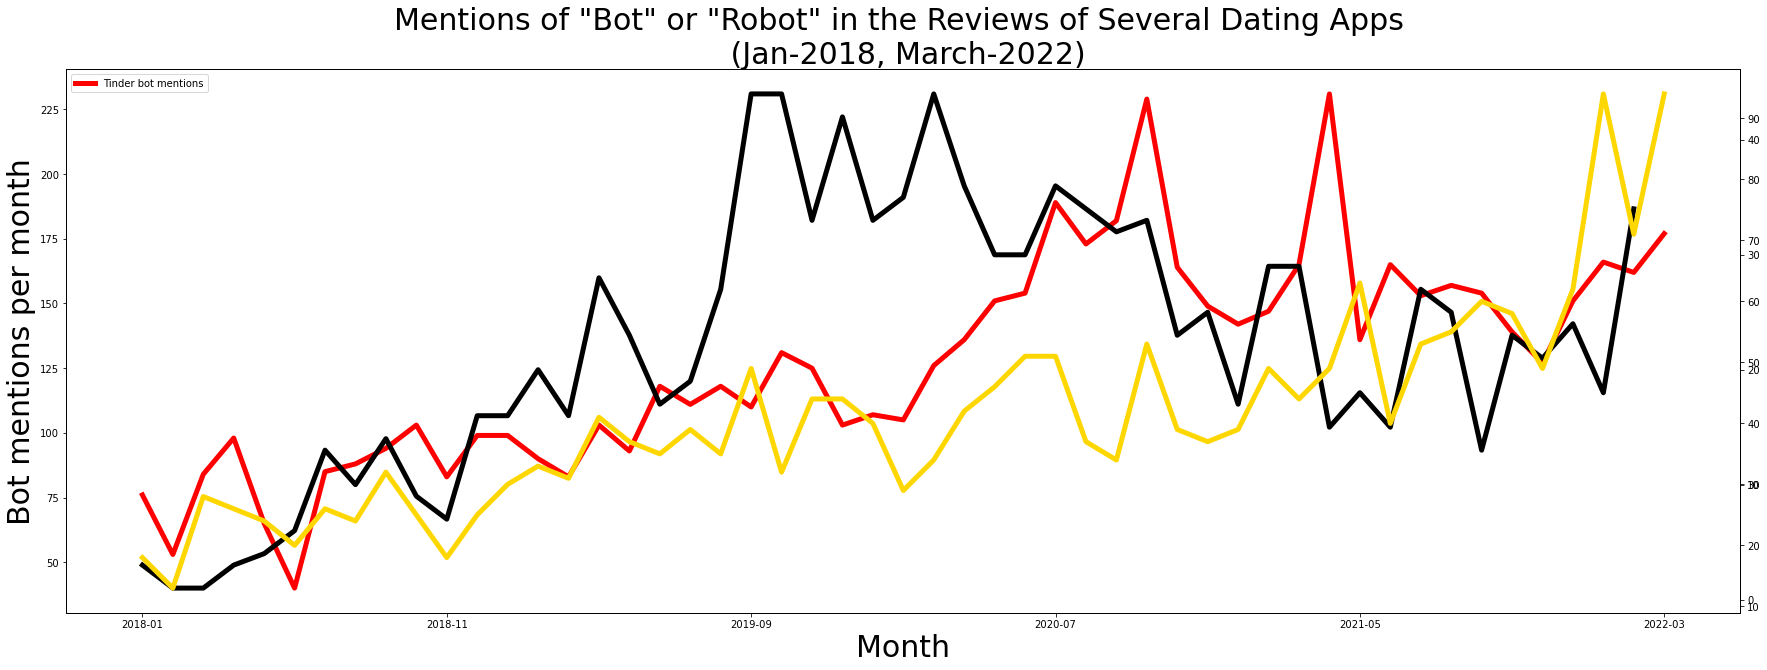

In [13]:
#Raw review count bot mentions

f,a = plt.subplots(figsize=(30,10))

searched_tinder[searched_tinder['bot']==True].groupby('month_year')['bot'].count().plot(ax=a, 
color='red',
linewidth=5, 
label="Tinder bot mentions")
plt.ylabel("Bot mentions per month", fontsize=30,color='black')
plt.xlabel("Month", fontsize=30,color='black')


a2 = a.twinx()

searched_hinge[searched_hinge['bot']==True].groupby('month_year')['bot'].count().plot(ax=a2, 
color='black',
linewidth=5, 
label="Hinge bot mentions")


a3 = a.twinx()

searched_bumble[searched_bumble['bot']==True].groupby('month_year')['bot'].count().plot(ax=a3, 
color='gold',
linewidth=5, 
label="Bumble bot mentions")

handles, labels = a.get_legend_handles_labels()
a.legend(handles, labels, loc='upper left')

plt.title('Mentions of "Bot" or "Robot" in the Reviews of Several Dating Apps \n (Jan-2018, March-2022)', fontsize=30)



Text(0.5, 1.0, 'Mentions of "Bot" Related Words in the Reviews of Several Dating Apps \n (Jan-2018, March-2022)')

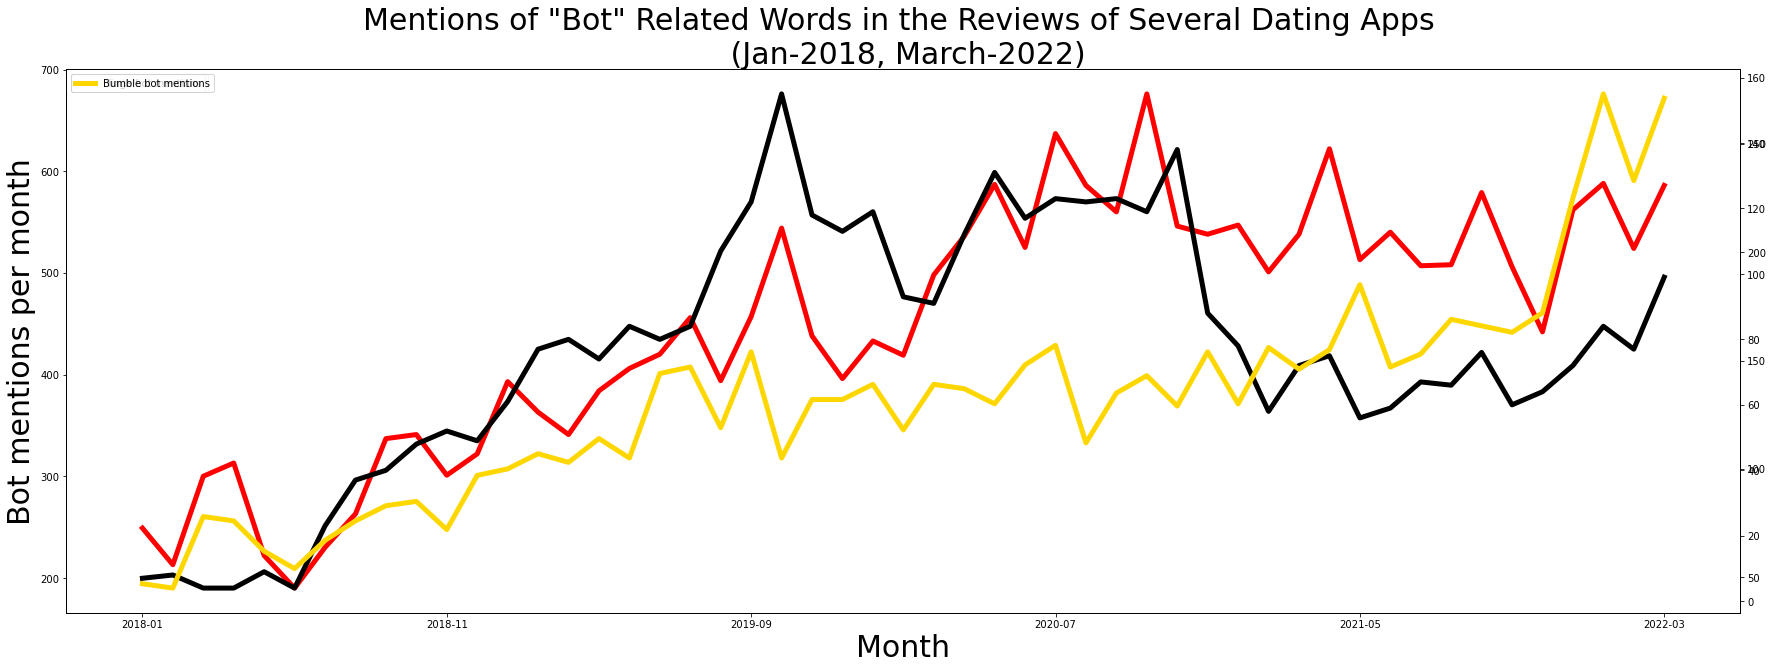

In [14]:
#Raw review count liberal bot mentions

f,a = plt.subplots(figsize=(30,10))

searched_tinder[searched_tinder['liberal_bot']==True].groupby('month_year')['liberal_bot'].count().plot(ax=a, 
color='red',
linewidth=5, 
label="Tinder bot mentions")
plt.legend(loc='upper left')
plt.ylabel("Bot mentions per month", fontsize=30,color='black')
plt.xlabel("Month", fontsize=30,color='black')

a2 = a.twinx()

searched_hinge[searched_hinge['liberal_bot']==True].groupby('month_year')['liberal_bot'].count().plot(ax=a2, 
color='black',
linewidth=5, 
label="Hinge bot mentions")
plt.legend(loc='upper left')


a3 = a.twinx()

searched_bumble[searched_bumble['liberal_bot']==True].groupby('month_year')['liberal_bot'].count().plot(ax=a3, 
color='gold',
linewidth=5, 
label="Bumble bot mentions")
plt.legend(loc='upper left')

plt.title('Mentions of "Bot" Related Words in the Reviews of Several Dating Apps \n (Jan-2018, March-2022)', fontsize=30)



In [15]:
#Empty data frame to be used with following function to graph bot mentions
df_graph = pd.DataFrame(columns=['month_year','bumble','hinge','tinder'])
months = reviews[0]
df_graph['month_year'] = months['month_year'].unique()

In [16]:
#Creating a graphing set with monthly bot concentrations for each app dataset
def monthly_reviews(list_df, df_graph, col):

    #list_df: list of each dating app df
    #df_graph: empty df for all three datasets
    #col: column name to be analyzing
    
    count = 1
    for df in list_df:
        grouped = df[df[col] == True].groupby('month_year')[col].count().reset_index()
        grouped_all = df.groupby('month_year')[col].count().reset_index()
        df_graph.iloc[:, count] = grouped[col]/grouped_all[col]
        count+=1

    return df_graph.sort_values(by='month_year').reset_index().drop(columns = ['index'])

In [17]:
fun = monthly_reviews(reviews, df_graph, 'bot')

In [18]:
fun.sort_values(by='bumble')

,month_year,bumble,hinge,tinder
41,2021-06,0.013636,0.009211,0.011389
34,2020-11,0.015759,0.013209,0.014381
26,2020-03,0.015934,0.019520,0.018936
38,2021-03,0.016058,0.015244,0.011555
25,2020-02,0.016083,0.022472,0.021875
33,2020-10,0.016490,0.014582,0.014851
30,2020-07,0.016667,0.016206,0.018846
36,2021-01,0.016865,0.020558,0.012891
37,2021-02,0.016931,0.011127,0.009781
40,2021-05,0.017361,0.019488,0.015297


In [19]:
#changing month_year to datetime for graphing purposes
fun['month_year'] = pd.to_datetime(fun['month_year'])

fun.at[0, 'hinge_bot'] = 3/150

/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/790960536.py:26: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x1 = np.datetime64("2020-01-31 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/790960536.py:27: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  q = np.datetime64("2020-03-01 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/790960536.py:28: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x2 = np.datetime64("2020-04-21 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/790960536.py:29: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x3 = np.datetime64("2020-12-21 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/

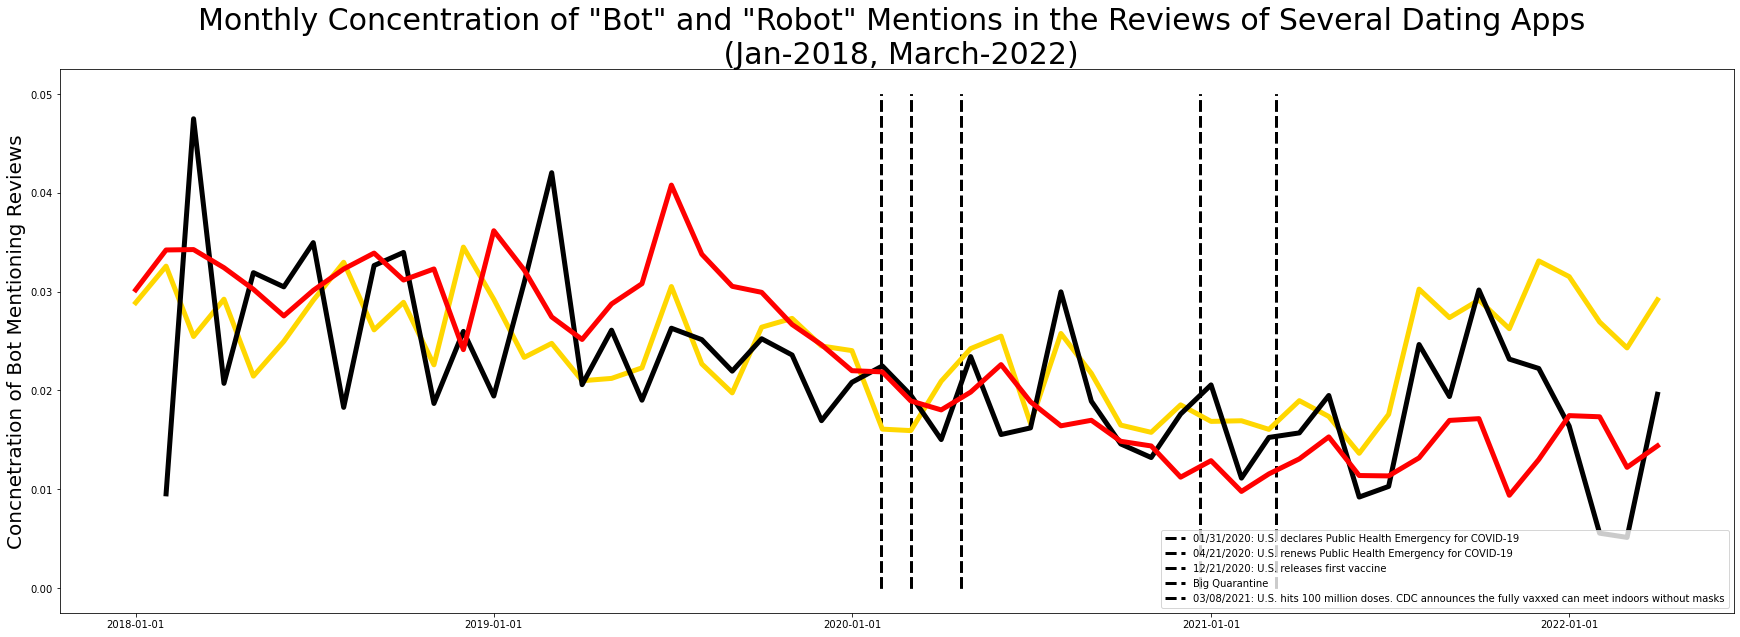

In [20]:
#Concentration liberal bot mentions
import numpy as np

fig, ax = plt.subplots(figsize=(30,10))

x = fun['month_year']
y = fun['bumble']
y2 = fun['hinge']
y3 = fun['tinder']

bum_plot = ax.plot(x, y, color='gold',linewidth=5, label="Bumble bot mentions")
hing_plot = ax.plot(x, y2, color='black',linewidth=5,label="Hinge bot mentions")
tin_plot = ax.plot(x, y3, color='red',linewidth=5, label="Tinder bot mentions")

plt.legend( loc='upper left')

plt.ylabel("Concnetration of Bot Mentioning Reviews", fontsize=20,color='black')

plt.xticks(['2018-01','2019-01','2020-01','2021-01','2022-01'],fontsize=10)

plt.title('Monthly Concentration of "Bot" and "Robot" Mentions in the Reviews of Several Dating Apps \n (Jan-2018, March-2022)', fontsize=30)

#important dates 

#vertical lines dates
x1 = np.datetime64("2020-01-31 00:00:00+00:00")
q = np.datetime64("2020-03-01 00:00:00+00:00")
x2 = np.datetime64("2020-04-21 00:00:00+00:00")
x3 = np.datetime64("2020-12-21 00:00:00+00:00")
x4 = np.datetime64("2021-03-08 00:00:00+00:00")

#US declares COVID emergency
x1_l = plt.vlines(x1, 0, 0.05, colors='black', label="01/31/2020: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x1, 0, 0.05, colors='black', label="01/31/2020: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x1, 0, 0.05, colors='black', label="01/31/2020: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#big quarantine 
q_l = plt.vlines(q, 0, 0.05, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')
plt.vlines(q, 0, 0.05, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')
plt.vlines(q, 0, 0.05, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')

#renewed emergency call
x2_l = plt.vlines(x2, 0, 0.05, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x2, 0, 0.05, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x2, 0, 0.05, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#vaccines drop first doses
x3_l = plt.vlines(x3, 0, 0.05, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
plt.vlines(x3, 0, 0.05, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
plt.vlines(x3, 0, 0.05, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')

#CDC announces fully vaxxed can meet inside without masks 
x4_l = plt.vlines(x4, 0, 0.05, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
plt.vlines(x4, 0, 0.05, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
plt.vlines(x4, 0, 0.05, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')

plt.legend(handles= [x1_l, x2_l, x3_l, q_l, x4_l], loc='lower right')


plt.show()


In [21]:
fun_2 = monthly_reviews(reviews, df_graph, 'liberal_bot')

#changing month_year to datetime for graphing purposes
fun_2['month_year'] = pd.to_datetime(fun_2['month_year'])

/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/2918059460.py:26: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x1 = np.datetime64("2020-01-31 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/2918059460.py:27: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  q = np.datetime64("2020-03-01 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/2918059460.py:28: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x2 = np.datetime64("2020-04-21 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/2918059460.py:29: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x3 = np.datetime64("2020-12-21 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000g

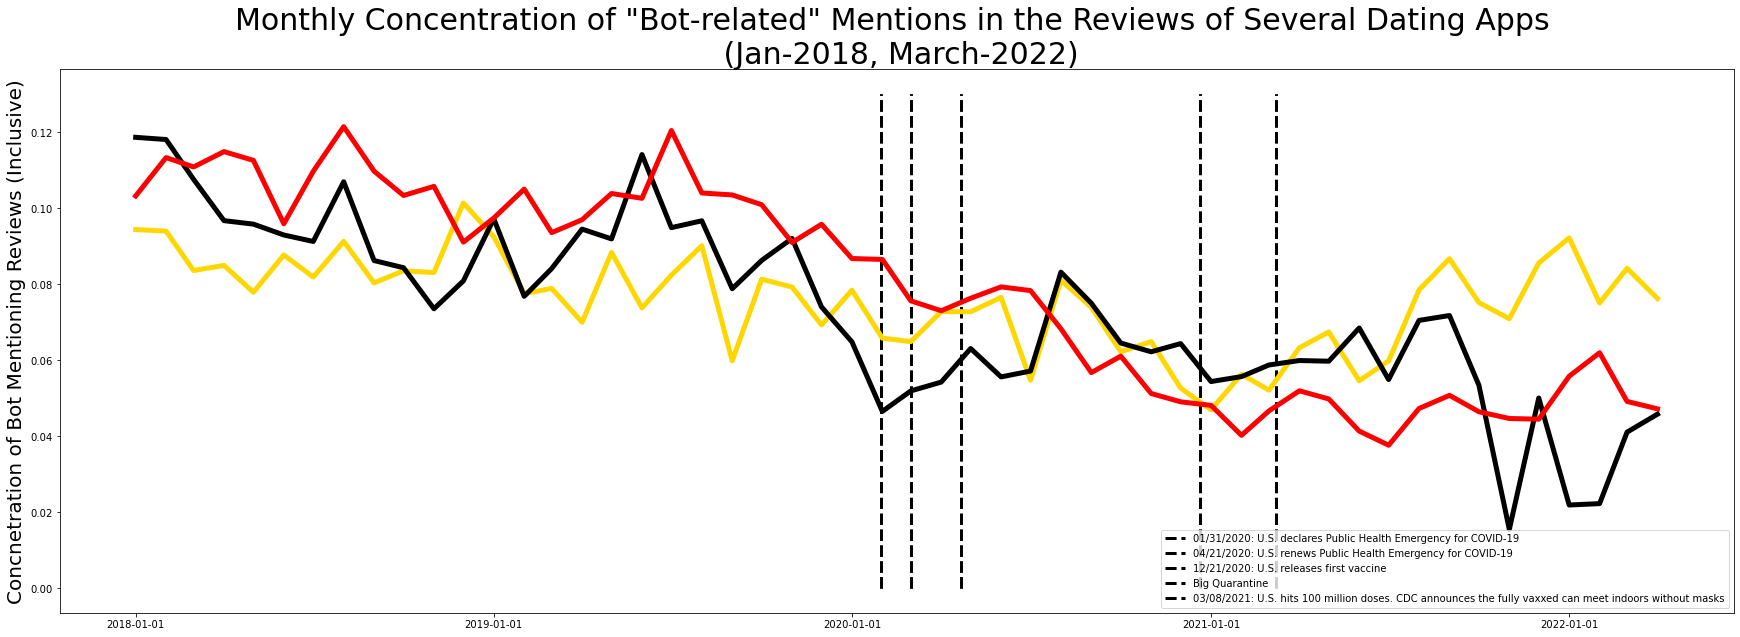

In [22]:
#Concentration of liberal bot mentions
import numpy as np

fig, ax = plt.subplots(figsize=(30,10))

x = fun_2['month_year']
y = fun_2['bumble']
y2 = fun_2['hinge']
y3 = fun_2['tinder']

bum_plot = ax.plot(x, y, color='gold',linewidth=5, label="Bumble bot mentions")
hing_plot = ax.plot(x, y2, color='black',linewidth=5,label="Hinge bot mentions")
tin_plot = ax.plot(x, y3, color='red',linewidth=5, label="Tinder bot mentions")

plt.legend( loc='upper left')

plt.ylabel("Concnetration of Bot Mentioning Reviews (Inclusive)", fontsize=20,color='black')

plt.xticks(['2018-01','2019-01','2020-01','2021-01','2022-01'],fontsize=10)

plt.title('Monthly Concentration of "Bot-related" Mentions in the Reviews of Several Dating Apps \n (Jan-2018, March-2022)', fontsize=30)

#important dates 

#vertical lines dates
x1 = np.datetime64("2020-01-31 00:00:00+00:00")
q = np.datetime64("2020-03-01 00:00:00+00:00")
x2 = np.datetime64("2020-04-21 00:00:00+00:00")
x3 = np.datetime64("2020-12-21 00:00:00+00:00")
x4 = np.datetime64("2021-03-08 00:00:00+00:00")

#US declares COVID emergency
x1_l = plt.vlines(x1, 0, 0.13, colors='black', label="01/31/2020: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x1, 0, 0.13, colors='black', label="01/31/2020: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x1, 0, 0.13, colors='black', label="01/31/2020: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#big quarantine 
q_l = plt.vlines(q, 0, 0.13, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')
plt.vlines(q, 0, 0.13, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')
plt.vlines(q, 0, 0.13, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')

#renewed emergency call
x2_l = plt.vlines(x2, 0, 0.13, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x2, 0, 0.13, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x2, 0, 0.13, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#vaccines drop first doses
x3_l = plt.vlines(x3, 0, 0.13, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
plt.vlines(x3, 0, 0.13, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
plt.vlines(x3, 0, 0.13, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')

#CDC announces fully vaxxed can meet inside without masks 
x4_l = plt.vlines(x4, 0, 0.13, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
plt.vlines(x4, 0, 0.13, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
plt.vlines(x4, 0, 0.13, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')

plt.legend(handles= [x1_l, x2_l, x3_l, q_l, x4_l], loc='lower right')


plt.show()

In [23]:
fun_3 = monthly_reviews(reviews, df_graph, 'race')

#changing month_year to datetime for graphing purposes
fun_3['month_year'] = pd.to_datetime(fun_3['month_year'])

/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/1358920558.py:26: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x1 = np.datetime64("2020-01-31 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/1358920558.py:27: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  q = np.datetime64("2020-03-01 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/1358920558.py:28: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x2 = np.datetime64("2020-04-21 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/1358920558.py:29: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x3 = np.datetime64("2020-12-21 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000g

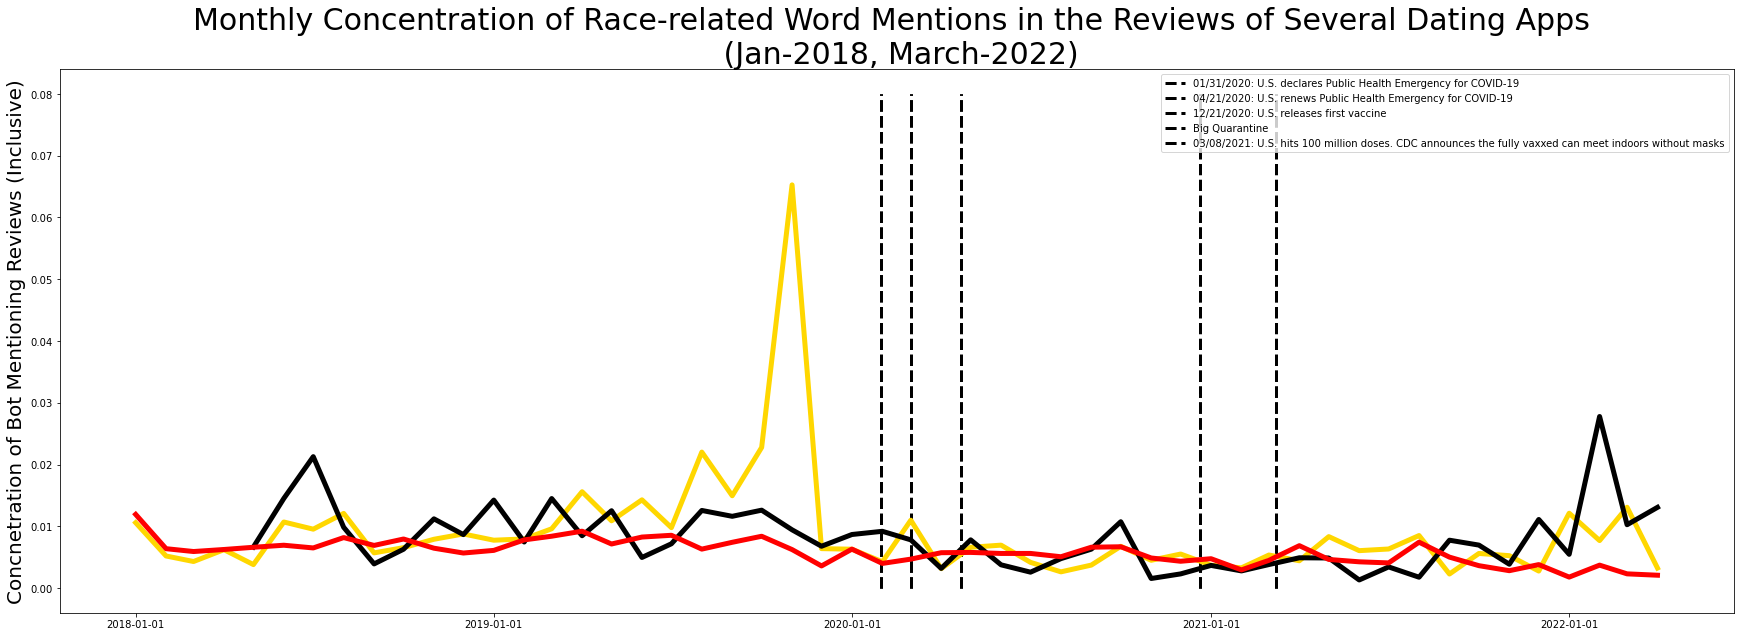

In [24]:
#Concentration of race word mentions
import numpy as np

fig, ax = plt.subplots(figsize=(30,10))

x = fun_3['month_year']
y = fun_3['bumble']
y2 = fun_3['hinge']
y3 = fun_3['tinder']

bum_plot = ax.plot(x, y, color='gold',linewidth=5, label="Bumble race mentions")
hing_plot = ax.plot(x, y2, color='black',linewidth=5,label="Hinge race mentions")
tin_plot = ax.plot(x, y3, color='red',linewidth=5, label="Tinder race mentions")

plt.legend( loc='upper left')

plt.ylabel("Concnetration of Bot Mentioning Reviews (Inclusive)", fontsize=20,color='black')

plt.xticks(['2018-01','2019-01','2020-01','2021-01','2022-01'],fontsize=10)

plt.title('Monthly Concentration of Race-related Word Mentions in the Reviews of Several Dating Apps \n (Jan-2018, March-2022)', fontsize=30)

#important dates 

#vertical lines dates
x1 = np.datetime64("2020-01-31 00:00:00+00:00")
q = np.datetime64("2020-03-01 00:00:00+00:00")
x2 = np.datetime64("2020-04-21 00:00:00+00:00")
x3 = np.datetime64("2020-12-21 00:00:00+00:00")
x4 = np.datetime64("2021-03-08 00:00:00+00:00")

#US declares COVID emergency
x1_l = plt.vlines(x1, 0, 0.08, colors='black', label="01/31/2020: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x1, 0, 0.08, colors='black', label="01/31/2020: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x1, 0, 0.08, colors='black', label="01/31/2020: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#big quarantine 
q_l = plt.vlines(q, 0, 0.08, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')
plt.vlines(q, 0, 0.08, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')
plt.vlines(q, 0, 0.08, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')

#renewed emergency call
x2_l = plt.vlines(x2, 0, 0.08, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x2, 0, 0.08, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x2, 0, 0.08, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#vaccines drop first doses
x3_l = plt.vlines(x3, 0, 0.08, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
plt.vlines(x3, 0, 0.08, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
plt.vlines(x3, 0, 0.08, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')

#CDC announces fully vaxxed can meet inside without masks 
x4_l = plt.vlines(x4, 0, 0.08, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
plt.vlines(x4, 0, 0.08, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
plt.vlines(x4, 0, 0.08, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')

plt.legend(handles= [x1_l, x2_l, x3_l, q_l, x4_l], loc='upper right')


plt.show()

In [25]:
fun_4 = monthly_reviews(reviews, df_graph, 'lgbtq')

#changing month_year to datetime for graphing purposes
fun_4['month_year'] = pd.to_datetime(fun_4['month_year'])

/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/4008145142.py:26: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x1 = np.datetime64("2019-01-31 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/4008145142.py:27: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  q = np.datetime64("2019-03-01 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/4008145142.py:28: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x2 = np.datetime64("2020-04-21 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/4008145142.py:29: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x3 = np.datetime64("2020-12-21 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000g

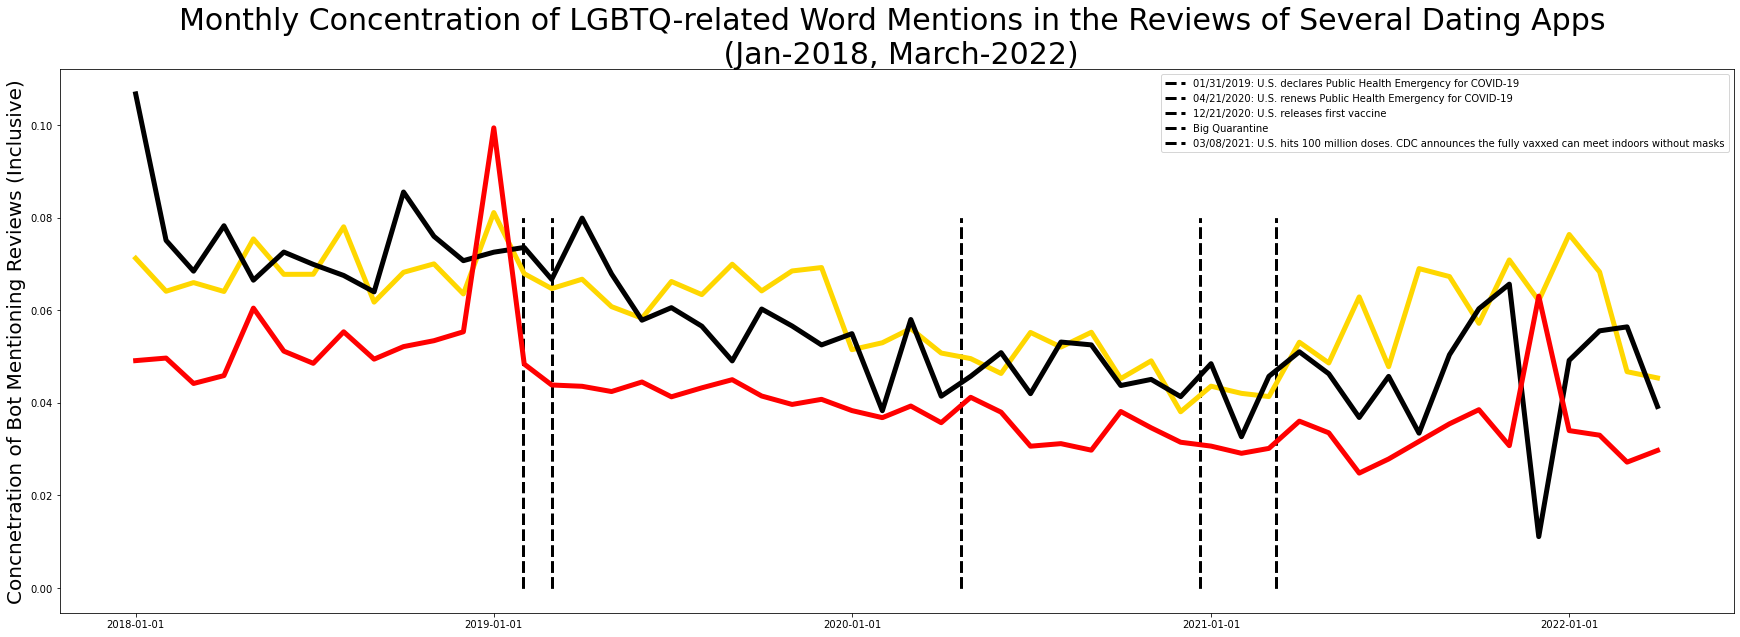

In [26]:
#Concentration of lgbtq related word mentions
import numpy as np

fig, ax = plt.subplots(figsize=(30,10))

x = fun_4['month_year']
y = fun_4['bumble']
y2 = fun_4['hinge']
y3 = fun_4['tinder']

bum_plot = ax.plot(x, y, color='gold',linewidth=5, label="Bumble race mentions")
hing_plot = ax.plot(x, y2, color='black',linewidth=5,label="Hinge race mentions")
tin_plot = ax.plot(x, y3, color='red',linewidth=5, label="Tinder race mentions")

plt.legend( loc='upper left')

plt.ylabel("Concnetration of Bot Mentioning Reviews (Inclusive)", fontsize=20,color='black')

plt.xticks(['2018-01','2019-01','2020-01','2021-01','2022-01'],fontsize=10)

plt.title('Monthly Concentration of LGBTQ-related Word Mentions in the Reviews of Several Dating Apps \n (Jan-2018, March-2022)', fontsize=30)

#important dates 

#vertical lines dates
x1 = np.datetime64("2019-01-31 00:00:00+00:00")
q = np.datetime64("2019-03-01 00:00:00+00:00")
x2 = np.datetime64("2020-04-21 00:00:00+00:00")
x3 = np.datetime64("2020-12-21 00:00:00+00:00")
x4 = np.datetime64("2021-03-08 00:00:00+00:00")

#US declares COVID emergency
x1_l = plt.vlines(x1, 0, 0.08, colors='black', label="01/31/2019: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x1, 0, 0.08, colors='black', label="01/31/2019: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x1, 0, 0.08, colors='black', label="01/31/2019: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#big quarantine 
q_l = plt.vlines(q, 0, 0.08, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')
plt.vlines(q, 0, 0.08, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')
plt.vlines(q, 0, 0.08, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')

#renewed emergency call
x2_l = plt.vlines(x2, 0, 0.08, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x2, 0, 0.08, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x2, 0, 0.08, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#vaccines drop first doses
x3_l = plt.vlines(x3, 0, 0.08, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
plt.vlines(x3, 0, 0.08, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
plt.vlines(x3, 0, 0.08, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')

#CDC announces fully vaxxed can meet inside without masks 
x4_l = plt.vlines(x4, 0, 0.08, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
plt.vlines(x4, 0, 0.08, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
plt.vlines(x4, 0, 0.08, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')

plt.legend(handles= [x1_l, x2_l, x3_l, q_l, x4_l], loc='upper right')


plt.show()

In [27]:
fun_5 = monthly_reviews(reviews, df_graph, 'politics')

#changing month_year to datetime for graphing purposes
fun_5['month_year'] = pd.to_datetime(fun_4['month_year'])

/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/3992531399.py:26: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x1 = np.datetime64("2020-01-31 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/3992531399.py:27: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  q = np.datetime64("2020-03-01 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/3992531399.py:28: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x2 = np.datetime64("2020-04-21 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_4317/3992531399.py:29: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x3 = np.datetime64("2020-12-21 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000g

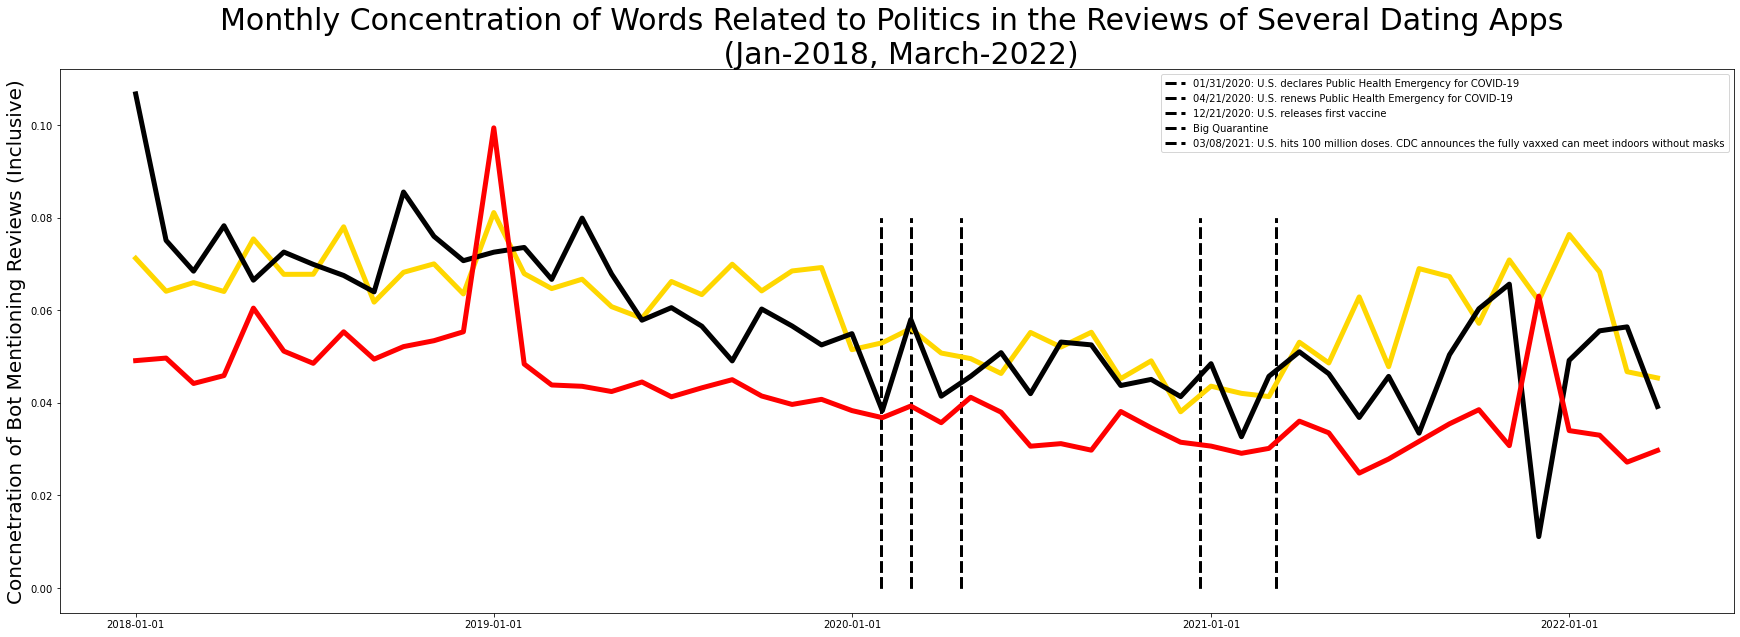

In [35]:
#Concentration of words related to politics
import numpy as np

fig, ax = plt.subplots(figsize=(30,10))

x = fun_4['month_year']
y = fun_4['bumble']
y2 = fun_4['hinge']
y3 = fun_4['tinder']

bum_plot = ax.plot(x, y, color='gold',linewidth=5, label="Bumble race mentions")
hing_plot = ax.plot(x, y2, color='black',linewidth=5,label="Hinge race mentions")
tin_plot = ax.plot(x, y3, color='red',linewidth=5, label="Tinder race mentions")

plt.legend( loc='upper left')

plt.ylabel("Concnetration of Bot Mentioning Reviews (Inclusive)", fontsize=20,color='black')

plt.xticks(['2018-01','2019-01','2020-01','2021-01','2022-01'],fontsize=10)

plt.title('Monthly Concentration of Words Related to Politics in the Reviews of Several Dating Apps \n (Jan-2018, March-2022)', fontsize=30)

#important dates 

#vertical lines dates
x1 = np.datetime64("2020-01-31 00:00:00+00:00")
q = np.datetime64("2020-03-01 00:00:00+00:00")
x2 = np.datetime64("2020-04-21 00:00:00+00:00")
x3 = np.datetime64("2020-12-21 00:00:00+00:00")
x4 = np.datetime64("2021-03-08 00:00:00+00:00")

#US declares COVID emergency
x1_l = plt.vlines(x1, 0, 0.08, colors='black', label="01/31/2020: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x1, 0, 0.08, colors='black', label="01/31/2020: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x1, 0, 0.08, colors='black', label="01/31/2020: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#big quarantine 
q_l = plt.vlines(q, 0, 0.08, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')
plt.vlines(q, 0, 0.08, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')
plt.vlines(q, 0, 0.08, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')

#renewed emergency call
x2_l = plt.vlines(x2, 0, 0.08, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x2, 0, 0.08, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x2, 0, 0.08, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#vaccines drop first doses
x3_l = plt.vlines(x3, 0, 0.08, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
plt.vlines(x3, 0, 0.08, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
plt.vlines(x3, 0, 0.08, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')

#CDC announces fully vaxxed can meet inside without masks 
x4_l = plt.vlines(x4, 0, 0.08, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
plt.vlines(x4, 0, 0.08, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
plt.vlines(x4, 0, 0.08, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')

plt.legend(handles= [x1_l, x2_l, x3_l, q_l, x4_l], loc='upper right')


plt.show()

Sentiment Correlation Analysis

In [29]:
#Drops in average sentiment when bots are mentioned

print("Tinder: ", -1*round(searched_tinder['comp_sent'].mean() - (searched_tinder[searched_tinder.liberal_bot == True]['comp_sent'].mean()), 4))
print("Bumble: ", -1*round(searched_bumble['comp_sent'].mean() - (searched_bumble[searched_bumble.liberal_bot == True]['comp_sent'].mean()), 4))
print("Hinge: ", -1*round(searched_hinge['comp_sent'].mean() - (searched_hinge[searched_hinge.liberal_bot == True]['comp_sent'].mean()), 4))



Tinder:  -0.3687
Bumble:  -0.3223
Hinge:  -0.3278


In [30]:
#Sentiment score/topic correlation function
def corr_bot(col, reviews):
    corr_output = pd.DataFrame(columns=['comp_sent',col])
    for i in reviews:
        bot_and_sent = i.groupby("month_year")[['comp_sent',col]].mean()
        corr_output = corr_output.append(bot_and_sent.corr())

    corr_output = corr_output[corr_output.comp_sent != 1].drop(columns=[col]).reset_index().rename(columns={'index':'app','comp_sent':'correlation'})
    corr_output['app'] = ['bumble','hinge','tinder']

    return corr_output

In [31]:
#You can test out any variable, just specify the col argument

hi = corr_bot('liberal_bot',reviews)
hi

,app,correlation
0,bumble,-0.708173
1,hinge,-0.754735
2,tinder,-0.925087


In [32]:
pd.options.display.max_colwidth = 500
pd.options.display.max_columns = 30

searched_tinder[searched_tinder.race == True].sort_values(by='comp_sent').head(10)

,Unnamed: 0,userName,full_text,clean_text,score,thumbs,date,time_stamp,reply_status,reply_content,comp_sent,neg_sent,pos_sent,neu_sent,words,bot,liberal_bot,race,lgbtq,politics,current_issues,month_year
45410,45410,Ron Check,If any woman gets any kind of problem with you she can not only block you but have you banned from the site for no goddamn reason just cuz she says something they don't investigate what about my experience they let any woman get her panties in a bunch and be Petty and it's okay for women must be Petty and bat black your screens this to be spiteful is ridiculous I hate to say it I'ma start complaining about this on YouTube because I'm not the only guy who gets dead end because of this algorithm,if any woman gets any kind of problem with you she can not only block you but have you banned from the site for no goddamn reason just cuz she says something they dont investigate what about my experience they let any woman get her panties in a bunch and be petty and its okay for women must be petty and bat black your screens this to be spiteful is ridiculous i hate to say it ima start complaining about this on youtube because im not the only guy who gets dead end because of this algorithm,1,1,2021-06-28,2021-06-28 06:55:56,False,NaN,-0.9878,0.304,0.033,0.663,"[if, any, woman, gets, any, kind, of, problem, with, you, she, can, not, only, block, you, but, have, you, banned, from, the, site, for, no, goddamn, reason, just, cuz, she, says, something, they, dont, investigate, what, about, my, experience, they, let, any, woman, get, her, panties, in, a, bunch, and, be, petty, and, its, okay, for, women, must, be, petty, and, bat, black, your, screens, this, to, be, spiteful, is, ridiculous, i, hate, to, say, it, ima, start, complaining, about, this, on...",False,False,True,False,False,False,2021-06
34084,34084,Midnight Blue,"You deleted review on the Racist you have on your app. D aka Divian Moodley is a Racist computer engineer age 34, Indian from Durban South Africa. Watch out women who match with that unstable individual. He will harass & use a decoy number to harass you after you reject him. He possibly is working with a female who's number is used to harass you after blocking Divian Moodley a disgusting racist. Tinder stop deleting reviews to safe guard other users with this individual. You deleted the critic",you deleted review on the racist you have on your app d aka divian moodley is a racist computer engineer age 34 indian from durban south africa watch out women who match with that unstable individual he will harass use a decoy number to harass you after you reject him he possibly is working with a female whos number is used to harass you after blocking divian moodley a disgusting racist tinder stop deleting reviews to safe guard other users with this individual you deleted the critic,1,0,2021-09-09,2021-09-09 20:27:40,False,NaN,-0.9856,0.339,0.050,0.611,"[you, deleted, review, on, the, racist, you, have, on, your, app, d, aka, divian, moodley, is, a, racist, computer, engineer, age, 34, indian, from, durban, south, africa, watch, out, women, who, match, with, that, unstable, individual, he, will, harass, , use, a, decoy, number, to, harass, you, after, you, reject, him, he, possibly, is, working, with, a, female, whos, number, is, used, to, harass, you, after, blocking, divian, moodley, a, disgusting, racist, tinder, stop, deleting, reviews,...",False,False,True,False,False,False,2021-09
138837,138837,mingmerci,"They ban your account for no reason without telling you why. Men arent allowed topless pictures but women can show bikini pictures, isn't that sexist? I have tried to find out why I was banned and they tell me nothing, I wasnt abusive, harassing or anything untoward on my profile and still banned me. So If someone doesn't like you they can get your profile banned without questions asked. Absolutely disgraceful, if you're going to ban then you should be told why.",they ban your account for no reason with

Word counts

In [33]:
dating_stop_words = stopwords.words('english')+['tinder','bumble','hinge','amp','app','get','like','im','far','bot','bots',"'"]
bot_reviews = [searched_bumble[searched_bumble['bot']==True],
searched_hinge[searched_hinge.bot == True],
searched_tinder[searched_tinder['bot']==True]]

vct = CountVectorizer(stop_words=dating_stop_words)
count = 0
all_apps = pd.DataFrame(columns=['word','count'])
for i in bot_reviews:
    Y = vct.fit_transform(list(i['clean_text']))

    dating_apps = ['bumble','hinge','tinder']

    word_counts_2 = pd.DataFrame(Y.sum(axis=0))

    word_counts_2.columns = vct.get_feature_names()
    word_counts_2 = word_counts_2.T

    word_counts_2 = word_counts_2[0].sort_values(ascending=False)
    print(dating_apps[count])
    count+=1
    all_apps = all_apps.append(word_counts_2.head(10).reset_index().rename(columns={'index':'word',0:'count'}))

bumble
hinge
tinder


In [34]:
all_apps

,word,count
0,dont,826
1,people,571
2,matches,467
3,even,463
4,match,439
5,women,436
6,bother,426
7,time,405
8,pay,349
9,one,339
